## Optimize signal function for magnetic field in tungsten wheel 

In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
now = datetime.now

In [4]:
# We want to optimise using PTMCMC
from PTMCMCSampler.PTMCMCSampler import PTMCMCSampler

Do not have mpi4py package.


In [5]:
# chi2 function as likelihood
from scripts_magnetic_field_calculation import chi2_one_exp_one_freq

### Load data and set-up physical parameters

Do not edit this cell

In [6]:
# Directory for saved plots
SaveDir = 'PythonFigs/FitFigs/Exp2_new_dir/Single_freqs/'

In [7]:
rtr_dims  = {'height':10,'outer_radius':18.9,'inner_radius':15,'hole_radius':2.5,'bar_width':7} # mm

sampling_factor = 100
f_sample = 500

dat = loadmat('data_2019-03-05.mat')
Time1 = np.array(dat['Time1'])
Time0 = np.array(dat['Time0'])
XCh0  = np.array(dat['ZCh0'])
XCh1  = np.array(dat['ZCh1'])
YCh0  = np.array(dat['YCh0'])
YCh1  = np.array(dat['YCh1'])

D_wheel_sensor = 10
Exp1_sensor_loc = {'coordinate':'cartesian','location':-np.array([rtr_dims['outer_radius']+D_wheel_sensor,0,0])}

Exp1_Freq       = [0.1,5  ,  3]
Exp1_Start_Time = [300,220,189]
Exp1_Stop_Time  = [330,220.5,190]

# Exp1_Freq       = [0.1,3,5]
# Exp1_Start_Time = [300,189,220]
# Exp1_Stop_Time  = [330,190,220.5]

Exp1A_Freq       = [0.5,  1,0.1]
Exp1A_Start_Time = [ 40, 97,  1]
Exp1A_Stop_Time  = [ 50,100, 28]

Exp1_Time_cut = {}
Exp1_X_cut    = {}
Exp1_Y_cut    = {}
Exp1A_Time_cut = {}
Exp1A_X_cut    = {}
Exp1A_Y_cut    = {}
# f_new_sample = {0.1:10,3:300,5:500,0.5:50}
# f_old_sample = 500
arraybool = {}
loop_theta = 0
loop_time =0
for  ii in range(len(Exp1_Freq)):
#    loop_nu            = Freq[ii]
    key           = Exp1_Freq[ii]
    f_new_sample = sampling_factor*key
    n_skips = int(np.ceil(f_sample/f_new_sample))
    arraybool = (Time1>Exp1_Start_Time[ii] )& (Time1<Exp1_Stop_Time[ii])
    Time_Full_Sample = Time1[arraybool]-Exp1_Start_Time[ii] + loop_time
    if ii < len(Exp1_Freq)-1:
        loop_theta += (Exp1_Stop_Time[ii]- Exp1_Start_Time[ii])*Exp1_Freq[ii]
        loop_time = loop_theta/Exp1_Freq[ii+1]
    new_indices = (np.arange(0,len(Time_Full_Sample),n_skips))
    Exp1_Time_cut[key] = Time_Full_Sample[new_indices]
    X_Full_Sample = 1e-12*XCh1[arraybool]
    Y_Full_Sample = 1e-12*YCh1[arraybool]
    Exp1_X_cut[key]         = X_Full_Sample[new_indices]
    Exp1_Y_cut[key]         = Y_Full_Sample[new_indices]

loop_theta = 0
loop_time =0
for  ii in range(len(Exp1A_Freq)):
#    loop_nu            = Freq[ii]
    key           = Exp1A_Freq[ii]
    f_new_sample = sampling_factor*key
    n_skips = int(np.ceil(f_sample/f_new_sample))
    arraybool = ((Time1>Exp1A_Start_Time[ii] )& (Time1<Exp1A_Stop_Time[ii]))
    Time_Full_Sample = Time1[arraybool] - Exp1A_Start_Time[ii] + loop_time
    if ii < len(Exp1A_Freq)-1:
        loop_theta += (Exp1A_Stop_Time[ii]- Exp1A_Start_Time[ii])*Exp1A_Freq[ii]
        loop_time = loop_theta/Exp1A_Freq[ii+1]
    new_indices = (np.arange(0,len(Time_Full_Sample),n_skips))
    X_Full_Sample = 1e-12*XCh1[arraybool]
    Y_Full_Sample = 1e-12*YCh1[arraybool]
    Exp1A_Time_cut[key] = Time_Full_Sample[new_indices]
    Exp1A_X_cut[key]         = X_Full_Sample[new_indices]
    Exp1A_Y_cut[key]         = Y_Full_Sample[new_indices]

### Experiment 1 (5Hz)

[18, 0, 2, -18, 18, 0, 18, 280, 4.5, 10, 0, 0, -5.26983047, 37.6604069]
0.01864656629395843


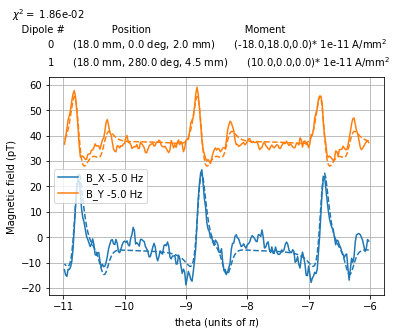

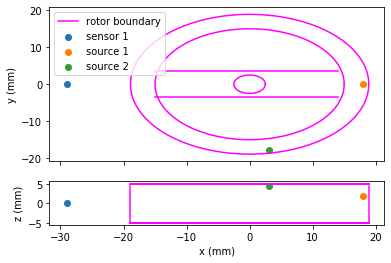

In [8]:
nu = 5
nowtext = now().strftime("%Y%m%d%H%M")
Opt_Settings_Exp1_5Hz = {'number of sources': 2,
                'location coordinate system': 'polar',
                'moment coordinate system':'polar',
                'location dimensions': 3,
                'moment dimensions': 3,
                'rotation sign':-1, # 1 for positive, -1 for negative, 0 for unknown and making it a free parameter
                'rotation frequency':nu,
                'rotor dimensions':rtr_dims,
                'time':Exp1_Time_cut[nu],
                'number of sensors':1,
                'sensor locations':[Exp1_sensor_loc],
                'sensor field order':[[0,1]],# list which order of B component of each sensor (0 for x, 1 for y, 2 for z) 
                'B data':[Exp1_X_cut[nu],Exp1_Y_cut[nu]],
                'bar location':320,
                'plot':1,
                'saveplot':0,
                'plotlabels':['B_X','B_Y'],
                'figname':SaveDir+'Exp1_5Hz_2src_'+nowtext+'_0'
                         
}

Opt_Params_Exp1_5Hz = [   18, 0,  2, -18,18, 0,

                        18, 280, 4.5, 10, 0 ,0,
       -5.26983047e+00,  3.76604069e+01]

chi_Exp1_5Hz = chi2_one_exp_one_freq(Opt_Params_Exp1_5Hz,Opt_Settings_Exp1_5Hz)

### Defining likelihood function

Either use chi squared distribution:
$$
\chi^2 = \sum^n_{i=1}\frac{(O_i-E_i)^2}{E_i}
$$

Or take difference between chi squared and true signal to construct a Gaussian likelihood:
$$
\mathcal{N} = \frac{1}{\sqrt{2\pi}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}, \\
\rm{where} \quad \mu = 0 \quad \rm{and} \quad x = \chi^2 - \rm{signal}
$$

In [9]:
class GaussianLikelihood(object):
    
    def __init__(self, ndim=2, pmin=-10, pmax=10):
        
        self.a = np.ones(ndim)*pmin
        self.b = np.ones(ndim)*pmax
        
        # get means
#         self.mu = np.random.uniform(pmin, pmax, ndim)
        self.mu = Opt_Settings_Exp1_5Hz['B data'][0]

        # ... and a positive definite, non-trivial covariance matrix.
        cov  = 0.5-np.random.rand(ndim**2).reshape((ndim, ndim))
        cov  = np.triu(cov)
        cov += cov.T - np.diag(cov.diagonal())
        self.cov  = np.dot(cov,cov)

        # Invert the covariance matrix first.
        self.icov = np.linalg.inv(self.cov)
        
    def lnlikefn(self, x):
        model = chi2_one_exp_one_freq(x, Opt_Settings_Exp1_5Hz)
        diff = model - self.mu
        return -np.dot(diff,np.dot(self.icov, diff))/2.0
    
    def lnpriorfn(self, x):
        
        if np.all(self.a <= x) and np.all(self.b >= x):
            return 0.0
        else:
            return -np.inf

### Run sampler

In [10]:
ndim = len(Opt_Params_Exp1_5Hz)
pmin= Opt_Settings_Exp1_5Hz['B data'][0].min()
pmax=Opt_Settings_Exp1_5Hz['B data'][0].max()

Opt_Settings_Exp1_5Hz['plot'] = 0
glo = GaussianLikelihood(ndim=ndim, pmin = pmin, pmax = pmax)

In [16]:
p0 = np.array(Opt_Params_Exp1_5Hz)
cov = np.eye(ndim)*0.1**2

In [17]:
sampler = PTMCMCSampler.PTSampler(ndim, glo.lnlikefn, glo.lnpriorfn, np.copy(cov), outDir='./chains')

In [ ]:
sampler.sample(p0, 60000, burn=500, thin=1, covUpdate=500,
               SCAMweight=10, AMweight=10, DEweight=10)

0.1039213163888911
1.0
0.011546812932099006
0.1039213163888911
0.1039213163888911
1.0
0.1039213163888911
1.6165538104938608
0.025980329097222775
0.057734064660495014
1.0
1.0
0.030424873310482697
0.21742883671051533
0.14696448550585273
1.0
0.016329387278428083
0.14696448550585273
0.14696448550585273
1.0
0.14696448550585273
2.286114218979931
0.03674112137646318
0.08164693639214035
1.0
1.0
0.043026551318145353
0.3074856846666427
0.2649241212120936
1.0
0.02943601346801039
0.2649241212120936
0.2649241212120936
1.0
0.2649241212120936
4.121041885521453
0.0662310303030234
0.14718006734005193
1.0
1.0
0.07756140034452576
0.5542861223595754
0.33669022854843894
1.0
0.03741002539427098
0.33669022854843894
0.33669022854843894
1.0
0.33669022854843894
5.237403555197936
0.08417255713710974
0.1870501269713549
1.0
1.0
0.0985722458531015
0.7044383892437892
0.34461056280967367
1.0
0.038290062534408184
0.34461056280967367
0.34461056280967367
1.0
0.34461056280967367
5.360608754817143
0.08615264070241842
0.19

1.0
1.0
0.29374060829015985
2.099192923612386
1.013960901613075
1.0
0.1126623224014528
1.013960901613075
1.013960901613075
1.0
1.013960901613075
15.772725136203388
0.25349022540326877
0.5633116120072639
1.0
1.0
0.2968556697060697
2.1214544519688476
1.0218672907966084
1.0
0.11354081008851202
1.0218672907966084
1.0218672907966084
1.0
1.0218672907966084
15.895713412391684
0.2554668226991521
0.5677040504425601
1.0
1.0
0.29917041029646196
2.1379965538444945
1.0297121879437963
1.0
0.1144124653270885
1.0297121879437963
1.0297121879437963
1.0
1.0297121879437963
16.017745145792386
0.25742804698594907
0.5720623266354425
1.0
1.0
0.30146714796425467
2.154409999325147
1.037496987947435
1.0
0.11527744310527055
1.037496987947435
1.037496987947435
1.0
1.037496987947435
16.13884203473788
0.25937424698685874
0.5763872155263529
1.0
1.0
0.3037462910899231
2.1706977068680433
1.0400787998993148
1.0
0.11556431109992396
1.0400787998993148
1.0400787998993148
1.0
1.0400787998993148
16.179003553989354
0.26001969

3.113755759346716
1.506020049667334
1.0
0.1673355610741482
1.506020049667334
1.506020049667334
1.0
1.506020049667334
23.426978550380756
0.3765050124168335
0.8366778053707414
1.0
1.0
0.4409150192315462
3.150962659446112
1.5148311589084769
1.0
0.16831457321205304
1.5148311589084769
1.5148311589084769
1.0
1.5148311589084769
23.564040249687416
0.3787077897271192
0.841572866060265
1.0
1.0
0.44349463322896143
3.169397657182878
1.5165870598155589
1.0
0.16850967331283984
1.5165870598155589
1.5165870598155589
1.0
1.5165870598155589
23.59135426379757
0.3791467649538897
0.842548366564199
1.0
1.0
0.4440087054568745
3.1730714317738102
1.5288202510432678
1.0
0.16986891678258528
1.5288202510432678
1.5288202510432678
1.0
1.5288202510432678
23.781648349561948
0.38220506276081695
0.8493445839129264
1.0
1.0
0.4475901967833812
3.1986662628472
1.5461233974039719
1.0
0.1717914886004413
1.5461233974039719
1.5461233974039719
1.0
1.5461233974039719
24.05080840406179
0.38653084935099297
0.8589574430022064
1.0
1

28.962973688640627
0.4654763628531527
1.0343919174514504
1.0
1.0
0.545107004450738
3.895562050529284
1.8703977518164416
1.0
0.20782197242404907
1.8703977518164416
1.8703977518164416
1.0
1.8703977518164416
29.095076139366878
0.4675994379541104
1.0391098621202457
1.0
1.0
0.5475932813078767
3.913330022125135
1.8732195786933252
1.0
0.20813550874370285
1.8732195786933252
1.8732195786933252
1.0
1.8732195786933252
29.1389712241184
0.4683048946733313
1.040677543718514
1.0
1.0
0.5484194229332583
3.919233974813177
1.877444007154408
1.0
0.20860488968382304
1.877444007154408
1.877444007154408
1.0
1.877444007154408
29.20468455573523
0.469361001788602
1.0430244484191158
1.0
1.0
0.5496562019233995
3.928072513411195
1.9177786916117299
1.0
0.21308652129019232
1.9177786916117299
1.9177786916117299
1.0
1.9177786916117299
29.832112980626917
0.47944467290293247
1.065432606450961
1.0
1.0
0.5614649213206793
4.012462548347076
1.9342114439740037
1.0
0.21491238266377824
1.9342114439740037
1.9342114439740037
1.0

2.317892801662752
2.317892801662752
1.0
2.317892801662752
36.05611024808725
0.579473200415688
1.2877182231459734
1.0
1.0
0.6786056729108909
4.849599225622236
2.329119241258377
1.0
0.25879102680648647
2.329119241258377
2.329119241258377
1.0
2.329119241258377
36.23074375290809
0.5822798103145943
1.2939551340324318
1.0
1.0
0.6818924192137046
4.873087685800542
2.336943369018599
1.0
0.25966037433539985
2.336943369018599
2.336943369018599
1.0
2.336943369018599
36.35245240695597
0.5842358422546498
1.2983018716769996
1.0
1.0
0.6841830762621481
4.889457676638739
2.3547224358722194
1.0
0.26163582620802445
2.3547224358722194
2.3547224358722194
1.0
2.3547224358722194
36.62901566912342
0.5886806089680549
1.3081791310401223
1.0
1.0
0.6893882244973356
4.926655837305942
2.3569347021078038
1.0
0.26188163356753374
2.3569347021078038
2.3569347021078038
1.0
2.3569347021078038
36.66342869945471
0.5892336755269509
1.3094081678376686
1.0
1.0
0.6900359060537821
4.931284439895007
2.3580399996607353
1.0
0.26200

0.28776850070846893
2.5899165063762193
2.5899165063762193
1.0
2.5899165063762193
40.28759009918563
0.6474791265940548
1.4388425035423438
1.0
1.0
0.7582456066698529
5.418739414841937
2.595899410608971
1.0
0.28843326784544115
2.595899410608971
2.595899410608971
1.0
2.595899410608971
40.380657498361764
0.6489748526522428
1.4421663392272055
1.0
1.0
0.7599972117267884
5.431257115278002
2.6048456691328186
1.0
0.2894272965703132
2.6048456691328186
2.6048456691328186
1.0
2.6048456691328186
40.51982151984384
0.6512114172832046
1.4471364828515654
1.0
1.0
0.7626163931579818
5.449974878402484
2.6068291773723877
1.0
0.2896476863747096
2.6068291773723877
2.6068291773723877
1.0
2.6068291773723877
40.55067609245937
0.6517072943430969
1.4482384318735488
1.0
1.0
0.7631971016112249
5.4541248632575785
2.6088110395350603
1.0
0.2898678932816734
2.6088110395350603
2.6088110395350603
1.0
2.6088110395350603
40.58150505943426
0.6522027598837651
1.4493394664083668
1.0
1.0
0.763777328145235
5.458271404116798
2.60

1.0
0.8181953290359232
5.847165139483559
2.7992725912279433
1.0
0.3110302879142159
2.7992725912279433
2.7992725912279433
1.0
2.7992725912279433
43.544240307990215
0.6998181478069858
1.555151439571079
1.0
1.0
0.8195384441716036
5.85676360053676
2.803851920127024
1.0
0.3115391022363359
2.803851920127024
2.803851920127024
1.0
2.803851920127024
43.615474313087056
0.700962980031756
1.5576955111816804
1.0
1.0
0.8208791267807443
5.866344677740556
2.806595546208965
1.0
0.3118439495787738
2.806595546208965
2.806595546208965
1.0
2.806595546208965
43.65815294102834
0.7016488865522412
1.55921974789387
1.0
1.0
0.8216823736876833
5.872085015219854
2.808422980962804
1.0
0.312046997884756
2.808422980962804
2.808422980962804
1.0
2.808422980962804
43.68657970386584
0.702105745240701
1.56023498942378
1.0
1.0
0.8222173887625562
5.875908456131674
2.8184504093561764
1.0
0.3131611565951308
2.8184504093561764
2.8184504093561764
1.0
2.8184504093561764
43.842561923318314
0.7046126023390441
1.5658057829756544
1.

2.9496934739053824
1.0
0.3277437193228203
2.9496934739053824
2.9496934739053824
1.0
2.9496934739053824
45.88412070519484
0.7374233684763456
1.6387185966141016
1.0
1.0
0.8635769192192625
6.171480914308401
2.952286571456098
1.0
0.32803184127289986
2.952286571456098
2.952286571456098
1.0
2.952286571456098
45.92445777820597
0.7380716428640245
1.6401592063644987
1.0
1.0
0.8643360961350652
6.176906309246808
2.9566027379409623
1.0
0.32851141532677375
2.9566027379409623
2.9566027379409623
1.0
2.9566027379409623
45.99159814574832
0.7391506844852406
1.6425570766338682
1.0
1.0
0.8655997331159289
6.185936786250595
2.9677918458005106
1.0
0.32975464953338995
2.9677918458005106
2.9677918458005106
1.0
2.9677918458005106
46.1656509346746
0.7419479614501276
1.64877324766695
1.0
1.0
0.8688755498676151
6.209347139297183
2.97036723487181
1.0
0.3300408038746455
2.97036723487181
2.97036723487181
1.0
2.97036723487181
46.20571254245038
0.7425918087179525
1.6502040193732275
1.0
1.0
0.8696295423009504
6.21473548

3.143964217353626
1.0
0.34932935748373634
3.143964217353626
3.143964217353626
1.0
3.143964217353626
48.90611004772306
0.7859910543384065
1.7466467874186813
1.0
1.0
0.9204532460666576
6.577942872476536
3.1487881097336494
1.0
0.349865345525961
3.1487881097336494
3.1487881097336494
1.0
3.1487881097336494
48.98114837363452
0.7871970274334124
1.749326727629804
1.0
1.0
0.9218655291248932
6.58803563635839
3.150394203905282
1.0
0.3500438004339203
3.150394203905282
3.150394203905282
1.0
3.150394203905282
49.006132060748854
0.7875985509763205
1.7502190021696018
1.0
1.0
0.9223357426806359
6.591395978581917
3.1536035958883604
1.0
0.3504003995431512
3.1536035958883604
3.1536035958883604
1.0
3.1536035958883604
49.056055936041176
0.7884008989720901
1.7520019977157557
1.0
1.0
0.9232753511063362
6.598110812358823
3.1560081986585513
1.0
0.3506675776287281
3.1560081986585513
3.1560081986585513
1.0
3.1560081986585513
49.09346086802193
0.7890020496646378
1.7533378881436406
1.0
1.0
0.9239793427144803
6.6031

1.8310360151807195
1.0
1.0
0.9649249384466742
6.895756138026046
3.298150813713648
1.0
0.3664612015237386
3.298150813713648
3.298150813713648
1.0
3.298150813713648
51.30456821332342
0.824537703428412
1.8323060076186937
1.0
1.0
0.9655942029313044
6.900538981223448
3.300434971333324
1.0
0.3667149968148138
3.300434971333324
3.300434971333324
1.0
3.300434971333324
51.34009955407391
0.825108742833331
1.8335749840740694
1.0
1.0
0.9662629320103292
6.9053179981890445
3.3027173039786497
1.0
0.36696858933096105
3.3027173039786497
3.3027173039786497
1.0
3.3027173039786497
51.375602506334545
0.8256793259946624
1.834842946654805
1.0
1.0
0.9669311267946077
6.910093196861497
3.3049978154304434
1.0
0.3672219794922714
3.3049978154304434
3.3049978154304434
1.0
3.3049978154304434
51.41107712891798
0.8262494538576108
1.8361098974613566
1.0
1.0
0.9675987883910435
6.914864585151197
3.3057575818562372
1.0
0.36730639798402637
3.3057575818562372
3.3057575818562372
1.0
3.3057575818562372
51.4228957177637
0.82643

53.89437465594676
0.8661595926848585
1.924799094855241
1.0
1.0
1.0143364918696571
7.248871711300007
3.467513945177439
1.0
0.3852793272419376
3.467513945177439
3.467513945177439
1.0
3.467513945177439
53.93910581387126
0.8668784862943597
1.926396636209688
1.0
1.0
1.0151783690803315
7.2548881170448105
3.4682324013825827
1.0
0.38535915570917606
3.4682324013825827
3.4682324013825827
1.0
3.4682324013825827
53.950281799284625
0.8670581003456457
1.9267957785458798
1.0
1.0
1.0153887103248447
7.256391303324014
3.4711044798449957
1.0
0.38567827553833267
3.4711044798449957
3.4711044798449957
1.0
3.4711044798449957
53.99495857536661
0.8677761199612489
1.9283913776916646
1.0
1.0
1.0162295640244814
7.262400394631966
3.4768402767455404
1.0
0.3863155863050598
3.4768402767455404
3.4768402767455404
1.0
3.4768402767455404
54.0841820827084
0.8692100691863851
1.9315779315252997
1.0
1.0
1.0179088238731597
7.27440108603031
3.477556469706854
1.0
0.3863951633007616
3.477556469706854
3.477556469706854
1.0
3.4775

3.6344845232852485
1.0
0.4038316136983611
3.6344845232852485
3.6344845232852485
1.0
3.6344845232852485
56.53642591777053
0.9086211308213121
2.0191580684918042
1.0
1.0
1.064062071308446
7.6042314454819415
3.6365226852035453
1.0
0.40405807613372724
3.6365226852035453
3.6365226852035453
1.0
3.6365226852035453
56.56813065872182
0.9091306713008863
2.020290380668636
1.0
1.0
1.0646587806295473
7.608495779213672
3.637880701727311
1.0
0.4042089668585903
3.637880701727311
3.637880701727311
1.0
3.637880701727311
56.589255360202635
0.9094701754318277
2.021044834292951
1.0
1.0
1.0650563648993092
7.611337082261563
3.639916591077327
1.0
0.4044351767863698
3.639916591077327
3.639916591077327
1.0
3.639916591077327
56.62092475009178
0.9099791477693318
2.0221758839318493
1.0
1.0
1.0656524088843244
7.615596661224059
3.6460161052853293
1.0
0.40511290058725885
3.6460161052853293
3.6460161052853293
1.0
3.6460161052853293
56.71580608221625
0.9115040263213323
2.0255645029362936
1.0
1.0
1.0674381536524087
7.628

3.811424981552176
1.0
3.811424981552176
59.28883304636718
0.952856245388044
2.117458323084542
1.0
1.0
1.115864638994602
7.974434204115551
3.8133495984501615
1.0
0.4237055109389068
3.8133495984501615
3.8133495984501615
1.0
3.8133495984501615
59.318771531446934
0.9533373996125404
2.1185275546945332
1.0
1.0
1.1164281059263843
7.978460973865815
3.821036252118004
1.0
0.4245595835686671
3.821036252118004
3.821036252118004
1.0
3.821036252118004
59.43834169961338
0.955259063029501
2.122797917843335
1.0
1.0
1.1186785149103364
7.994543335245277
3.826150227055911
1.0
0.4251278030062122
3.826150227055911
3.826150227055911
1.0
3.826150227055911
59.517892420869714
0.9565375567639778
2.125639015031062
1.0
1.0
1.1201757249631479
8.0052430228585
3.8299802401579046
1.0
0.425553360017545
3.8299802401579046
3.8299802401579046
1.0
3.8299802401579046
59.57747040245629
0.9574950600394762
2.1277668000877243
1.0
1.0
1.1212970316156687
8.013256347961468
3.83826259523759
1.0
0.4264736216930656
3.83826259523759
3

1.0
3.960571311061071
61.60888706094996
0.9901428277652677
2.2003173950339274
1.0
1.0
1.1595299652020818
8.286484840612573
3.961183414082211
1.0
0.440131490453579
3.961183414082211
3.961183414082211
1.0
3.961183414082211
61.61840866350104
0.9902958535205527
2.2006574522678943
1.0
1.0
1.1597091695993924
8.287765509992623
3.962407268315564
1.0
0.4402674742572845
3.962407268315564
3.962407268315564
1.0
3.962407268315564
61.63744639601985
0.990601817078891
2.201337371286423
1.0
1.0
1.1600674753954896
8.29032611268231
3.9666870698354812
1.0
0.44074300775949793
3.9666870698354812
3.9666870698354812
1.0
3.9666870698354812
61.70402108632973
0.9916717674588703
2.20371503879749
1.0
1.0
1.1613204658652247
8.299280505276275
3.9740105674242985
1.0
0.4415567297138108
3.9740105674242985
3.9740105674242985
1.0
3.9740105674242985
61.81794215993355
0.9935026418560746
2.2077836485690545
1.0
1.0
1.1634645542396973
8.314603055227723
3.9801007009873497
1.0
0.4422334112208168
3.9801007009873497
3.98010070098

1.2053522742193876
8.61395017607512
4.119999689320378
1.0
0.45777774325781956
4.119999689320378
4.119999689320378
1.0
4.119999689320378
64.08888405609476
1.0299999223300944
2.288888716289098
1.0
1.0
1.2062055499539472
8.620048040426608
4.124657483961548
1.0
0.45829527599572745
4.124657483961548
4.124657483961548
1.0
4.124657483961548
64.16133863940186
1.031164370990387
2.2914763799786373
1.0
1.0
1.207569204849672
8.629793287173452
4.125820892864836
1.0
0.4584245436516486
4.125820892864836
4.125820892864836
1.0
4.125820892864836
64.17943611123079
1.031455223216209
2.2921227182582427
1.0
1.0
1.2079098141656512
8.632227423433948
4.126402441594857
1.0
0.4584891601772063
4.126402441594857
4.126402441594857
1.0
4.126402441594857
64.18848242480888
1.0316006103987143
2.292445800886031
1.0
1.0
1.2080800732332762
8.633444165756435
4.134533249352338
1.0
0.45939258326137083
4.134533249352338
4.134533249352338
1.0
4.134533249352338
64.3149616565919
1.0336333123380845
2.2969629163068546
1.0
1.0
1.21

4.28807604410183
4.28807604410183
1.0
4.28807604410183
66.70340513047292
1.0720190110254575
2.382264468945461
1.0
1.0
1.2554129886047163
8.971704924389849
4.290842843777897
1.0
0.47676031597532204
4.290842843777897
4.290842843777897
1.0
4.290842843777897
66.74644423654507
1.0727107109444742
2.3838015798766103
1.0
1.0
1.2562230200067899
8.977493746701597
4.293054622294015
1.0
0.47700606914377947
4.293054622294015
4.293054622294015
1.0
4.293054622294015
66.78084968012912
1.0732636555735038
2.385030345718897
1.0
1.0
1.2568705587744073
8.982121328862132
4.295817272650223
1.0
0.4773130302944692
4.295817272650223
4.295817272650223
1.0
4.295817272650223
66.82382424122568
1.0739543181625557
2.386565151472346
1.0
1.0
1.2576793753869133
8.987901469780867
4.298025737475288
1.0
0.477558415275032
4.298025737475288
4.298025737475288
1.0
4.298025737475288
66.8581781385045
1.074506434368822
2.3877920763751597
1.0
1.0
1.2583259440106385
8.99252211888844
4.312894562819732
1.0
0.47921050697997003
4.31289

9.293118987989775
4.442226323590458
1.0
0.4935807026211621
4.442226323590458
4.442226323590458
1.0
4.442226323590458
69.10129836696267
1.1105565808976146
2.467903513105811
1.0
1.0
1.300543313038504
9.29422504935043
4.449618679167914
1.0
0.4944020754631015
4.449618679167914
4.449618679167914
1.0
4.449618679167914
69.21629056483418
1.1124046697919785
2.4720103773155078
1.0
1.0
1.3027075608533454
9.309691667072451
4.450146082995479
1.0
0.49446067588838655
4.450146082995479
4.450146082995479
1.0
4.450146082995479
69.2244946243741
1.1125365207488698
2.472303379441932
1.0
1.0
1.3028619680067068
9.310795125002828
4.458047230570801
1.0
0.49533858117453355
4.458047230570801
4.458047230570801
1.0
4.458047230570801
69.34740136443469
1.1145118076427003
2.4766929058726683
1.0
1.0
1.3051751740200623
9.327326260150807
4.459099316005418
1.0
0.4954554795561579
4.459099316005418
4.459099316005418
1.0
4.459099316005418
69.36376713786208
1.1147748290013546
2.4772773977807887
1.0
1.0
1.3054831913467508
9.3

1.1430905475945463
2.54020121687677
1.0
1.0
1.3386429772628279
9.56650114354543
4.574396065056019
1.0
0.5082662294506689
4.574396065056019
4.574396065056019
1.0
4.574396065056019
71.15727212309363
1.1435990162640048
2.541331147253345
1.0
1.0
1.339238431415573
9.570756507320475
4.574904343262272
1.0
0.5083227048069191
4.574904343262272
4.574904343262272
1.0
4.574904343262272
71.16517867296871
1.143726085815568
2.541613524034596
1.0
1.0
1.3393872391921589
9.571819949768582
4.587586620435628
1.0
0.50973184671507
4.587586620435628
4.587586620435628
1.0
4.587586620435628
71.36245854010977
1.146896655108907
2.548659233575349
1.0
1.0
1.3431002086742228
9.598354378588981
4.588599158784739
1.0
0.5098443509760818
4.588599158784739
4.588599158784739
1.0
4.588599158784739
71.37820913665149
1.1471497896961846
2.5492217548804104
1.0
1.0
1.343396647865565
9.60047285671283
4.589611395314423
1.0
0.5099568217016025
4.589611395314423
4.589611395314423
1.0
4.589611395314423
71.39395503822433
1.14740284882

1.0
4.692782533849188
72.9988394154318
1.173195633462297
2.6071014076939925
1.0
1.0
1.3738982436645697
9.818449984331858
4.694745759889454
1.0
0.521638417765495
4.694745759889454
4.694745759889454
1.0
4.694745759889454
73.0293784871693
1.1736864399723634
2.608192088827474
1.0
1.0
1.3744730141315966
9.82255753386036
4.696707858702732
1.0
0.5218564287447479
4.696707858702732
4.696707858702732
1.0
4.696707858702732
73.05990002426469
1.174176964675683
2.6092821437237403
1.0
1.0
1.3750474545822282
9.826662724954032
4.703566347995955
1.0
0.5226184831106616
4.703566347995955
4.703566347995955
1.0
4.703566347995955
73.16658763549263
1.1758915869989888
2.6130924155533077
1.0
1.0
1.3770554032408722
9.841012363704147
4.704545009881403
1.0
0.5227272233201558
4.704545009881403
4.704545009881403
1.0
4.704545009881403
73.18181126482182
1.1761362524703507
2.6136361166007784
1.0
1.0
1.3773419244755256
9.843059963972118
4.705523391717439
1.0
0.5228359324130488
4.705523391717439
4.705523391717439
1.0
4.7

1.0
1.4079530001508118
10.061819480457658
4.810051326129484
1.0
0.5344501473477203
4.810051326129484
4.810051326129484
1.0
4.810051326129484
74.82302062868082
1.202512831532371
2.672250736738601
1.0
1.0
1.4082308355945032
10.063805008440053
4.813370743044836
1.0
0.5348189714494264
4.813370743044836
4.813370743044836
1.0
4.813370743044836
74.87465600291969
1.203342685761209
2.674094857247131
1.0
1.0
1.4092026558391233
10.070750041312436
4.813844683826016
1.0
0.5348716315362241
4.813844683826016
4.813844683826016
1.0
4.813844683826016
74.88202841507136
1.203461170956504
2.6743581576811195
1.0
1.0
1.4093414107041033
10.071741641460534
4.815266114141563
1.0
0.5350295682379518
4.815266114141563
4.815266114141563
1.0
4.815266114141563
74.9041395533132
1.2038165285353908
2.6751478411897582
1.0
1.0
1.4097575605256503
10.074715621686284
4.8162134078547645
1.0
0.5351348230949738
4.8162134078547645
4.8162134078547645
1.0
4.8162134078547645
74.91887523329633
1.2040533519636911
2.6756741154748696
1

4.932160252870946
1.0
0.5480178058745495
4.932160252870946
4.932160252870946
1.0
4.932160252870946
76.72249282243693
1.2330400632177365
2.740089029372748
1.0
1.0
1.4439804657501227
10.319286778840373
4.933991386291629
1.0
0.5482212651435142
4.933991386291629
4.933991386291629
1.0
4.933991386291629
76.750977120092
1.2334978465729072
2.7411063257175723
1.0
1.0
1.4445165636776203
10.32311795826877
4.93582154863808
1.0
0.5484246165153418
4.93582154863808
4.93582154863808
1.0
4.93582154863808
76.77944631214787
1.23395538715952
2.7421230825767102
1.0
1.0
1.4450523773053072
10.326947105972119
4.93765074099009
1.0
0.5486278601100102
4.93765074099009
4.93765074099009
1.0
4.93765074099009
76.80790041540142
1.2344126852475226
2.7431393005500504
1.0
1.0
1.4455879069493145
10.330774224209632
4.940392713135263
1.0
0.548932523681696
4.940392713135263
4.940392713135263
1.0
4.940392713135263
76.85055331543742
1.2350981782838157
2.744662618408479
1.0
1.0
1.4463906696358986
10.336511101248275
4.943132508

5.092757578169218
1.0
0.5658619531299132
5.092757578169218
5.092757578169218
1.0
5.092757578169218
79.22067343818784
1.2731893945423045
2.8293097656495663
1.0
1.0
1.4909982812088636
10.655295702050628
5.093631709301331
1.0
0.5659590788112588
5.093631709301331
5.093631709301331
1.0
5.093631709301331
79.23427103357626
1.2734079273253327
2.8297953940562945
1.0
1.0
1.4912541991463517
10.65712459839059
5.09668943138583
1.0
0.5662988257095363
5.09668943138583
5.09668943138583
1.0
5.09668943138583
79.28183559933511
1.2741723578464574
2.8314941285476825
1.0
1.0
1.4921494034246674
10.663522101606661
5.100180667388167
1.0
0.5666867408209073
5.100180667388167
5.100180667388167
1.0
5.100180667388167
79.33614371492705
1.2750451668470417
2.8334337041045368
1.0
1.0
1.4931715268615053
10.670826622075106
5.10366838656275
1.0
0.5670742651736387
5.10366838656275
5.10366838656275
1.0
5.10366838656275
79.39039712430942
1.2759170966406874
2.835371325868193
1.0
1.0
1.4941926206824505
10.678123784478863
5.104

5.232405250933838
1.0
0.5813783612148707
5.232405250933838
5.232405250933838
1.0
5.232405250933838
81.39297057008193
1.3081013127334595
2.9068918060743543
1.0
1.0
1.531882701264396
10.947472823103606
5.232825072558799
1.0
0.5814250080620887
5.232825072558799
5.232825072558799
1.0
5.232825072558799
81.39950112869239
1.3082062681396998
2.907125040310443
1.0
1.0
1.532005611752795
10.948351192727024
5.239116298575553
1.0
0.5821240331750616
5.239116298575553
5.239116298575553
1.0
5.239116298575553
81.49736464450858
1.3097790746438882
2.910620165875307
1.0
1.0
1.5338474836726146
10.961513977820957
5.239535307639409
1.0
0.5821705897377121
5.239535307639409
5.239535307639409
1.0
5.239535307639409
81.50388256327969
1.3098838269098523
2.910852948688561
1.0
1.0
1.5339701562688326
10.962390647367602
5.245396118502398
1.0
0.5828217909447106
5.245396118502398
5.245396118502398
1.0
5.245396118502398
81.59505073225948
1.3113490296255994
2.9141089547235537
1.0
1.0
1.5356860162502026
10.974652898582269


5.337844654914565
5.337844654914565
1.0
5.337844654914565
83.03313907644879
1.3344611637286412
2.965469252730314
1.0
1.0
1.5627520225886338
11.16807787072626
5.3415080033638445
1.0
0.5935008892626492
5.3415080033638445
5.3415080033638445
1.0
5.3415080033638445
83.09012449677091
1.3353770008409611
2.967504446313246
1.0
1.0
1.5638245351042026
11.175742492571604
5.345980168313384
1.0
0.5939977964792649
5.345980168313384
5.345980168313384
1.0
5.345980168313384
83.15969150709708
1.336495042078346
2.9699889823963246
1.0
1.0
1.5651338434996438
11.185099356556256
5.35044655986769
1.0
0.5944940622075212
5.35044655986769
5.35044655986769
1.0
5.35044655986769
83.22916870905296
1.3376116399669224
2.972470311037606
1.0
1.0
1.5664414616276348
11.19444414118458
5.3557175989777495
1.0
0.5950797332197503
5.3557175989777495
5.3557175989777495
1.0
5.3557175989777495
83.311162650765
1.3389293997444374
2.9753986660987497
1.0
1.0
1.567984655100455
11.205472445499614
5.35693285285526
1.0
0.5952147614283624
5

3.0225338707779605
1.0
1.0
1.5928241088832735
11.382985544253
5.441351537991272
1.0
0.6045946153323635
5.441351537991272
5.441351537991272
1.0
5.441351537991272
84.64324614653091
1.360337884497818
3.0229730766618186
1.0
1.0
1.5930555629382095
11.384639611482898
5.44293213626626
1.0
0.604770237362918
5.44293213626626
5.44293213626626
1.0
5.44293213626626
84.66783323080851
1.360733034066565
3.023851186814589
1.0
1.0
1.593518312102119
11.387946610048532
5.447275053639205
1.0
0.6052527837376893
5.447275053639205
5.447275053639205
1.0
5.447275053639205
84.73538972327651
1.3618187634098013
3.026263918688447
1.0
1.0
1.594789780896598
11.397033056459541
5.448064088279433
1.0
0.6053404542532702
5.448064088279433
5.448064088279433
1.0
5.448064088279433
84.74766359545782
1.3620160220698583
3.026702271266352
1.0
1.0
1.5950207852737621
11.398683910104493
5.45633807970144
1.0
0.6062597866334934
5.45633807970144
5.45633807970144
1.0
5.45633807970144
84.87637012868908
1.36408451992536
3.03129893316746

1.0
0.6182264957117255
5.564038461405529
5.564038461405529
1.0
5.564038461405529
86.55170939964155
1.3910096153513822
3.0911324785586274
1.0
1.0
1.6289744122314873
11.641330692432343
5.56594500062658
1.0
0.6184383334029532
5.56594500062658
5.56594500062658
1.0
5.56594500062658
86.58136667641345
1.391486250156645
3.092191667014766
1.0
1.0
1.6295325865914507
11.645319639256538
5.567088416757902
1.0
0.618565379639767
5.567088416757902
5.567088416757902
1.0
5.567088416757902
86.59915314956736
1.3917721041894755
3.0928268981988345
1.0
1.0
1.6298673426563803
11.647711945743298
5.5678504829063105
1.0
0.6186500536562565
5.5678504829063105
5.5678504829063105
1.0
5.5678504829063105
86.6110075118759
1.3919626207265776
3.0932502682812815
1.0
1.0
1.6300904515124375
11.649306374700721
5.568231452624792
1.0
0.6186923836249771
5.568231452624792
5.568231452624792
1.0
5.568231452624792
86.61693370749676
1.392057863156198
3.093461918124884
1.0
1.0
1.630201987391916
11.650103456623764
5.570897058822755
1.

5.648057151800077
1.0
0.6275619057555641
5.648057151800077
5.648057151800077
1.0
5.648057151800077
87.85866680577898
1.4120142879500193
3.137809528777821
1.0
1.0
1.6535724263809695
11.817118362846998
5.651405191631547
1.0
0.627933910181283
5.651405191631547
5.651405191631547
1.0
5.651405191631547
87.91074742537961
1.4128512979078867
3.139669550906416
1.0
1.0
1.6545526265097839
11.824123281867584
5.652148756004216
1.0
0.6280165284449128
5.652148756004216
5.652148756004216
1.0
5.652148756004216
87.92231398228782
1.413037189001054
3.1400826422245647
1.0
1.0
1.6547703186313116
11.82567900058042
5.653263799788579
1.0
0.628140422198731
5.653263799788579
5.653263799788579
1.0
5.653263799788579
87.93965910782234
1.4133159499471448
3.1407021109936557
1.0
1.0
1.6550967681707682
11.828011945171001
5.654006960554612
1.0
0.628222995617179
5.654006960554612
5.654006960554612
1.0
5.654006960554612
87.95121938640509
1.413501740138653
3.141114978085895
1.0
1.0
1.6553143421290428
11.829566819439941
5.65

1.4333329548206863
3.1851843440459686
1.0
1.0
1.6785381508820414
11.995533844828081
5.735146379997636
1.0
0.6372384866664039
5.735146379997636
5.735146379997636
1.0
5.735146379997636
89.21338813329658
1.433786594999409
3.1861924333320206
1.0
1.0
1.679069396845652
11.999330350098502
5.739135014094023
1.0
0.637681668232669
5.739135014094023
5.739135014094023
1.0
5.739135014094023
89.27543355257366
1.4347837535235057
3.1884083411633455
1.0
1.0
1.680237142706476
12.007675549156561
5.744566542394649
1.0
0.638285171377183
5.744566542394649
5.744566542394649
1.0
5.744566542394649
89.35992399280565
1.4361416355986623
3.1914258568859144
1.0
1.0
1.6818273223363251
12.019039636150474
5.745651808976942
1.0
0.6384057565529934
5.745651808976942
5.745651808976942
1.0
5.745651808976942
89.37680591741909
1.4364129522442355
3.1920287827649676
1.0
1.0
1.682145054053183
12.021310279544037
5.748905534099513
1.0
0.6387672815666126
5.748905534099513
5.748905534099513
1.0
5.748905534099513
89.42741941932574
1

1.0
1.0
1.7153638075600837
12.258705349632631
5.861563763194938
1.0
0.6512848625772152
5.861563763194938
5.861563763194938
1.0
5.861563763194938
91.17988076081015
1.4653909407987344
3.2564243128860766
1.0
1.0
1.716080406729586
12.263826466234255
5.862961632997441
1.0
0.6514401814441598
5.862961632997441
5.862961632997441
1.0
5.862961632997441
91.2016254021824
1.4657404082493604
3.2572009072207995
1.0
1.0
1.716489658778381
12.266751152098443
5.867849622306283
1.0
0.6519832913673649
5.867849622306283
5.867849622306283
1.0
5.867849622306283
91.27766079143107
1.4669624055765706
3.259916456836825
1.0
1.0
1.7179207073893135
12.27697802244811
5.8692448909548816
1.0
0.6521383212172095
5.8692448909548816
5.8692448909548816
1.0
5.8692448909548816
91.29936497040931
1.4673112227387204
3.2606916060860467
1.0
1.0
1.7183291979025483
12.279897266061504
5.873775531972601
1.0
0.6526417257747331
5.873775531972601
5.873775531972601
1.0
5.873775531972601
91.36984160846266
1.4684438829931503
3.2632086288736

1.0
5.956680208807588
92.6594699147847
1.489170052201897
3.309266782670881
1.0
1.0
1.7439274924677886
12.462833357603929
5.958718317725717
1.0
0.6620798130806353
5.958718317725717
5.958718317725717
1.0
5.958718317725717
92.69117383128894
1.4896795794314293
3.310399065403176
1.0
1.0
1.7445241862721181
12.467097580446332
5.959736906944804
1.0
0.6621929896605336
5.959736906944804
5.959736906944804
1.0
5.959736906944804
92.7070185524747
1.489934226736201
3.3109649483026677
1.0
1.0
1.7448223969667376
12.469228718471594
5.960076367799327
1.0
0.6622307075332585
5.960076367799327
5.960076367799327
1.0
5.960076367799327
92.71229905465616
1.4900190919498317
3.3111535376662924
1.0
1.0
1.7449217803642116
12.4699389536887
5.960415794221073
1.0
0.662268421580119
5.960415794221073
5.960415794221073
1.0
5.960415794221073
92.71757902121664
1.4901039485552683
3.311342107900594
1.0
1.0
1.7450211536808584
12.470649116864012
5.9627908155493765
1.0
0.6625323128388196
5.9627908155493765
5.9627908155493765
1.

6.0544518488464325
1.0
6.0544518488464325
94.18036209316675
1.5136129622116081
3.363584360470241
1.0
1.0
1.7725519351221535
12.667395565778554
6.057420163733071
1.0
0.6730466848592305
6.057420163733071
6.057420163733071
1.0
6.057420163733071
94.22653588029225
1.5143550409332678
3.3652334242961515
1.0
1.0
1.7734209638018292
12.673606007247336
6.058079428333702
1.0
0.6731199364815227
6.058079428333702
6.058079428333702
1.0
6.058079428333702
94.23679110741317
1.5145198570834255
3.365599682407612
1.0
1.0
1.7736139756173956
12.674985350198147
6.0607151756207776
1.0
0.6734127972911977
6.0607151756207776
6.0607151756207776
1.0
6.0607151756207776
94.27779162076763
1.5151787939051944
3.367063986455989
1.0
1.0
1.7743856390265431
12.680499978826857
6.06269061061176
1.0
0.6736322900679735
6.06269061061176
6.06269061061176
1.0
6.06269061061176
94.30852060951628
1.51567265265294
3.368161450339868
1.0
1.0
1.7749639838880418
12.684633072469351
6.064664867904904
1.0
0.6738516519894338
6.064664867904904

6.134963325073753
95.43276283448058
1.5337408312684382
3.408312958374307
1.0
1.0
1.7961231479336768
12.835845285491914
6.1381818154890135
1.0
0.6820202017210016
6.1381818154890135
6.1381818154890135
1.0
6.1381818154890135
95.48282824094021
1.5345454538722534
3.4101010086050074
1.0
1.0
1.79706542009244
12.842579155416498
6.139468328772453
1.0
0.6821631476413835
6.139468328772453
6.139468328772453
1.0
6.139468328772453
95.50284066979366
1.5348670821931132
3.410815738206918
1.0
1.0
1.7974420704758356
12.845270856179635
6.140432882948887
1.0
0.6822703203276542
6.140432882948887
6.140432882948887
1.0
6.140432882948887
95.51784484587161
1.5351082207372218
3.4113516016382723
1.0
1.0
1.797724461419666
12.847288939666399
6.140754338027211
1.0
0.6823060375585789
6.140754338027211
6.140754338027211
1.0
6.140754338027211
95.52284525820102
1.5351885845068027
3.4115301877928945
1.0
1.0
1.7978185732955818
12.847961502391383
6.1420398435698855
1.0
0.6824488715077651
6.1420398435698855
6.14203984356988

6.213548196481621
1.0
0.6903942440535134
6.213548196481621
6.213548196481621
1.0
6.213548196481621
96.65519416749189
1.5533870491204052
3.4519712202675663
1.0
1.0
1.8191303118129105
13.00026407623661
6.215119599814632
1.0
0.6905688444238481
6.215119599814632
6.215119599814632
1.0
6.215119599814632
96.67963821933874
1.553779899953658
3.45284422211924
1.0
1.0
1.819590368988742
13.00355183673246
6.216062077392728
1.0
0.6906735641547475
6.216062077392728
6.216062077392728
1.0
6.216062077392728
96.69429898166464
1.554015519348182
3.4533678207737375
1.0
1.0
1.819866296603095
13.00552373057052
6.216690244012485
1.0
0.6907433604458315
6.216690244012485
6.216690244012485
1.0
6.216690244012485
96.70407046241642
1.5541725610031212
3.4537168022291587
1.0
1.0
1.820050203913818
13.006838008931693
6.217632266385654
1.0
0.6908480295984057
6.217632266385654
6.217632266385654
1.0
6.217632266385654
96.71872414377684
1.5544080665964135
3.45424014799203
1.0
1.0
1.8203259982585707
13.008808950369605
6.21857

6.277975673734329
1.0
0.6975528526371476
6.277975673734329
6.277975673734329
1.0
6.277975673734329
97.65739936920068
1.5694939184335823
3.4877642631857384
1.0
1.0
1.8379926386313303
13.135062132285356
6.279516120689555
1.0
0.6977240134099506
6.279516120689555
6.279516120689555
1.0
6.279516120689555
97.68136187739307
1.5698790301723888
3.488620067049754
1.0
1.0
1.8384436327592228
13.138285124459898
6.281055831625762
1.0
0.6978950924028624
6.281055831625762
6.281055831625762
1.0
6.281055831625762
97.70531293640074
1.5702639579064406
3.489475462014312
1.0
1.0
1.8388944114040353
13.141506576702445
6.282902513965977
1.0
0.698100279329553
6.282902513965977
6.282902513965977
1.0
6.282902513965977
97.73403910613743
1.5707256284914943
3.4905013966477654
1.0
1.0
1.8394350615631947
13.145370288277315
6.283210191454683
1.0
0.6981344657171872
6.283210191454683
6.283210191454683
1.0
6.283210191454683
97.73882520040618
1.5708025478636707
3.4906723285859353
1.0
1.0
1.8395251397968015
13.14601402491168

6.350493621758864
1.0
0.7056104024176515
6.350493621758864
6.350493621758864
1.0
6.350493621758864
98.7854563384712
1.587623405439716
3.5280520120882572
1.0
1.0
1.8592235993047503
13.286787433960749
6.351698478359941
1.0
0.7057442753733268
6.351698478359941
6.351698478359941
1.0
6.351698478359941
98.80419855226576
1.5879246195899852
3.528721376866634
1.0
1.0
1.859576343195214
13.28930828895257
6.355911893662467
1.0
0.706212432629163
6.355911893662467
6.355911893662467
1.0
6.355911893662467
98.8697405680828
1.5889779734156166
3.531062163145815
1.0
1.0
1.8608098978809926
13.298123785326558
6.35741533565332
1.0
0.7063794817392576
6.35741533565332
6.35741533565332
1.0
6.35741533565332
98.89312744349608
1.58935383391333
3.531897408696288
1.0
1.0
1.8612500581261744
13.30126935405578
6.357715938920204
1.0
0.7064128821022448
6.357715938920204
6.357715938920204
1.0
6.357715938920204
98.89780349431426
1.589428984730051
3.5320644105112247
1.0
1.0
1.8613380652514635
13.30189828968613
6.36432204087

Finished 15.00 percent in 60.574152 s Acceptance rate = 06.427873648415937
1.0
0.7142081831573263
6.427873648415937
6.427873648415937
1.0
6.427873648415937
99.98914564202568
1.6069684121039842
3.571040915786631
1.0
1.0
1.881878022762909
13.448685394507319
6.428167638604333
1.0
0.7142408487338149
6.428167638604333
6.428167638604333
1.0
6.428167638604333
99.99371882273405
1.6070419096510833
3.5712042436690736
1.0
1.0
1.8819640937880584
13.449300493958406
6.428461601347555
1.0
0.7142735112608397
6.428461601347555
6.428461601347555
1.0
6.428461601347555
99.99829157651759
1.6071154003368888
3.5713675563041987
1.0
1.0
1.8820501567781303
13.449915535987476
6.4296371779440245
1.0
0.7144041308826695
6.4296371779440245
6.4296371779440245
1.0
6.4296371779440245
100.01657832357373
1.6074092944860061
3.5720206544133464
1.0
1.0
1.8823943284096796
13.45237513004109
6.430812315718754
1.0
0.7145347017465282
6.430812315718754
6.430812315718754
1.0
6.430812315718754
100.03485824451396
1.6077030789296884


1.0
0.723300570686596
6.509705136179363
6.509705136179363
1.0
6.509705136179363
101.26207989612345
1.6274262840448408
3.6165028534329804
1.0
1.0
1.9058356931863063
13.61989690152971
6.510277901902497
1.0
0.7233642113224997
6.510277901902497
6.510277901902497
1.0
6.510277901902497
101.27098958514996
1.6275694754756242
3.616821056612499
1.0
1.0
1.9060033808674142
13.621095267651464
6.512854040280651
1.0
0.7236504489200724
6.512854040280651
6.512854040280651
1.0
6.512854040280651
101.31106284881014
1.6282135100701627
3.618252244600362
1.0
1.0
1.9067575926740878
13.626485179848796
6.513712277956404
1.0
0.7237458086618227
6.513712277956404
6.513712277956404
1.0
6.513712277956404
101.32441321265516
1.628428069489101
3.618729043309114
1.0
1.0
1.9070088575104316
13.628280823186891
6.51599975138121
1.0
0.7239999723756901
6.51599975138121
6.51599975138121
1.0
6.51599975138121
101.35999613259662
1.6289999378453024
3.6199998618784504
1.0
1.0
1.9076785573522852
13.633066777628622
6.51857114327979
1

102.39365568671182
1.6456123235364402
3.6569162745254213
1.0
1.0
1.9271328809732955
13.772095489785944
6.583568010585141
1.0
0.7315075567316822
6.583568010585141
6.583568010585141
1.0
6.583568010585141
102.41105794243556
1.6458920026462853
3.6575377836584124
1.0
1.0
1.9274604057499372
13.774436118469993
6.58552478091154
1.0
0.7317249756568378
6.58552478091154
6.58552478091154
1.0
6.58552478091154
102.44149659195732
1.646381195227885
3.6586248782841895
1.0
1.0
1.9280332861882057
13.778530161064557
6.585804217405799
1.0
0.7317560241562
6.585804217405799
6.585804217405799
1.0
6.585804217405799
102.44584338186797
1.6464510543514497
3.658780120780999
1.0
1.0
1.9281150963521991
13.779114810624359
6.59194536916076
1.0
0.7324383743511957
6.59194536916076
6.59194536916076
1.0
6.59194536916076
102.5413724091674
1.64798634229019
3.6621918717559776
1.0
1.0
1.9299130312765989
13.791963603620275
6.595011323720374
1.0
0.7327790359689308
6.595011323720374
6.595011323720374
1.0
6.595011323720374
102.58

1.0
6.6655047250752135
103.68562905672555
1.6663761812688034
3.703058180597341
1.0
1.0
1.951448883229463
13.945867785566954
6.667953352416316
1.0
0.7408837058240353
6.667953352416316
6.667953352416316
1.0
6.667953352416316
103.72371881536495
1.666988338104079
3.704418529120176
1.0
1.0
1.9521657638390089
13.950990913456529
6.668769118810459
1.0
0.7409743465344952
6.668769118810459
6.668769118810459
1.0
6.668769118810459
103.73640851482934
1.6671922797026149
3.7048717326724763
1.0
1.0
1.9524045944279111
13.952697696475349
6.670128237897679
1.0
0.7411253597664086
6.670128237897679
6.670128237897679
1.0
6.670128237897679
103.75755036729721
1.6675320594744198
3.705626798832045
1.0
1.0
1.9528025014933663
13.955541306355919
6.670671713553291
1.0
0.7411857459503657
6.670671713553291
6.670671713553291
1.0
6.670671713553291
103.7660044330512
1.6676679283883227
3.7059287297518284
1.0
1.0
1.9529616139694583
13.956678390485395
6.674201911839346
1.0
0.741577990204372
6.674201911839346
6.674201911839

6.727727728587119
1.0
0.7475253031763465
6.727727728587119
6.727727728587119
1.0
6.727727728587119
104.6535424446885
1.6819319321467798
3.737626515881733
1.0
1.0
1.9696658098873498
14.076053542833542
6.7282608265435115
1.0
0.7475845362826126
6.7282608265435115
6.7282608265435115
1.0
6.7282608265435115
104.66183507956578
1.6820652066358779
3.7379226814130626
1.0
1.0
1.9698218841014663
14.077168914275498
6.729326735268543
1.0
0.7477029705853937
6.729326735268543
6.729326735268543
1.0
6.729326735268543
104.67841588195508
1.6823316838171358
3.7385148529269694
1.0
1.0
1.9701339484502107
14.079399056292331
6.730392261228166
1.0
0.7478213623586852
6.730392261228166
6.730392261228166
1.0
6.730392261228166
104.69499073021592
1.6825980653070416
3.7391068117934263
1.0
1.0
1.9704459007373556
14.081628397470212
6.730658582932281
1.0
0.7478509536591424
6.730658582932281
6.730658582932281
1.0
6.730658582932281
104.69913351227997
1.6826646457330703
3.7392547682957114
1.0
1.0
1.9705238713057531
14.0821

1.6946834505299218
3.7659632233998255
1.0
1.0
1.9845987743571816
14.182770736367297
6.782137886389512
1.0
0.7535708762655016
6.782137886389512
6.782137886389512
1.0
6.782137886389512
105.49992267717016
1.695534471597378
3.7678543813275076
1.0
1.0
1.9855953825242696
14.189892914074168
6.782661240987934
1.0
0.7536290267764374
6.782661240987934
6.782661240987934
1.0
6.782661240987934
105.50806374870118
1.6956653102469834
3.7681451338821867
1.0
1.0
1.9857486041914572
14.19098790002581
6.7829228832414135
1.0
0.7536580981379348
6.7829228832414135
6.7829228832414135
1.0
6.7829228832414135
105.51213373931084
1.6957307208103534
3.768290490689674
1.0
1.0
1.985825204764769
14.191535319677376
6.789717390289525
1.0
0.7544130433655029
6.789717390289525
6.789717390289525
1.0
6.789717390289525
105.61782607117041
1.6974293475723812
3.772065216827515
1.0
1.0
1.9878144214464788
14.20575109190609
6.790239391950771
1.0
0.754471043550086
6.790239391950771
6.790239391950771
1.0
6.790239391950771
105.62594609

1.713563123290181
3.8079180517559585
1.0
1.0
2.0067082576406583
14.340774327098467
6.855018242864128
1.0
0.7616686936515699
6.855018242864128
6.855018242864128
1.0
6.855018242864128
106.63361711121978
1.713754560716032
3.8083434682578496
1.0
1.0
2.0069324449250683
14.342376462954784
6.855528629507719
1.0
0.7617254032786356
6.855528629507719
6.855528629507719
1.0
6.855528629507719
106.641556459009
1.7138821573769298
3.8086270163931784
1.0
1.0
2.0070818699853956
14.343444316770002
6.856038925647959
1.0
0.761782102849773
6.856038925647959
6.856038925647959
1.0
6.856038925647959
106.64949439896819
1.7140097314119898
3.8089105142488657
1.0
1.0
2.0072312685492038
14.34451198123005
6.858843937574319
1.0
0.762093770841591
6.858843937574319
6.858843937574319
1.0
6.858843937574319
106.69312791782272
1.7147109843935797
3.8104688542079552
1.0
1.0
2.0080524872891066
14.350380752924833
6.85935364593487
1.0
0.7621504051038746
6.85935364593487
6.85935364593487
1.0
6.85935364593487
106.7010567145424
1.

6.917622186127254
1.0
0.7686246873474725
6.917622186127254
6.917622186127254
1.0
6.917622186127254
107.60745622864614
1.7294055465318134
3.8431234367373626
1.0
1.0
2.025260898688967
14.473359239445553
6.91837112621172
1.0
0.7687079029124132
6.91837112621172
6.91837112621172
1.0
6.91837112621172
107.61910640773782
1.72959278155293
3.8435395145620657
1.0
1.0
2.025480164648818
14.474926205463591
6.921364905854913
1.0
0.7690405450949904
6.921364905854913
6.921364905854913
1.0
6.921364905854913
107.66567631329869
1.7303412264637283
3.8452027254749517
1.0
1.0
2.0263566486034943
14.48118992543757
6.922611379385673
1.0
0.7691790421539635
6.922611379385673
6.922611379385673
1.0
6.922611379385673
107.68506590155492
1.7306528448464182
3.845895210769818
1.0
1.0
2.0267215766141855
14.483797853235261
6.924355519468943
1.0
0.7693728354965492
6.924355519468943
6.924355519468943
1.0
6.924355519468943
107.71219696951687
1.7310888798672357
3.8468641774827446
1.0
1.0
2.027232205645005
14.4874470213034
6.9

6.985703239474176
1.0
0.7761892488304639
6.985703239474176
6.985703239474176
1.0
6.985703239474176
108.66649483626497
1.746425809868544
3.88094624415232
1.0
1.0
2.045192876986595
14.615801471180308
6.987408549669898
1.0
0.7763787277410998
6.987408549669898
6.987408549669898
1.0
6.987408549669898
108.693021883754
1.7468521374174746
3.881893638705499
1.0
1.0
2.0456921378549406
14.619369397617069
6.988382542477194
1.0
0.7764869491641324
6.988382542477194
6.988382542477194
1.0
6.988382542477194
108.70817288297854
1.7470956356192986
3.8824347458206625
1.0
1.0
2.0459772921312434
14.621407229030421
6.98886941071301
1.0
0.7765410456347788
6.98886941071301
6.98886941071301
1.0
6.98886941071301
108.71574638886902
1.7472173526782524
3.8827052281738936
1.0
1.0
2.046119831745909
14.622425876578616
6.990572776961842
1.0
0.7767303085513158
6.990572776961842
6.990572776961842
1.0
6.990572776961842
108.74224319718422
1.7476431942404604
3.883651542756578
1.0
1.0
2.046618523488113
14.62598973580255
6.990

1.0
0.7814775720105828
7.033298148095245
7.033298148095245
1.0
7.033298148095245
109.4068600814816
1.7583245370238112
3.9073878600529146
1.0
1.0
2.059127160301494
14.715381672571302
7.035213642811424
1.0
0.781690404756825
7.035213642811424
7.035213642811424
1.0
7.035213642811424
109.43665666595551
1.758803410702856
3.9084520237841254
1.0
1.0
2.0596879565470747
14.719389356483862
7.036649384472698
1.0
0.7818499316080776
7.036649384472698
7.036649384472698
1.0
7.036649384472698
109.45899042513084
1.7591623461181745
3.909249658040388
1.0
1.0
2.0601082962778317
14.722393279548681
7.039279621523782
1.0
0.782142180169309
7.039279621523782
7.039279621523782
1.0
7.039279621523782
109.49990522370325
1.7598199053809456
3.9107109008465453
1.0
1.0
2.0608783464642277
14.727896379414647
7.0395186085413535
1.0
0.7821687342823728
7.0395186085413535
7.0395186085413535
1.0
7.0395186085413535
109.50362279953218
1.7598796521353384
3.910843671411863
1.0
1.0
2.06094831430129
14.728396398766067
7.04119093264